## О задании
В этом задании вы будете обучать модель K-means на синтетических данных для кластеризации объектов и подбирать оптимальное число кластеров.

### Формат сдачи
Данное задание сдаётся через [эту гугл форму](https://forms.gle/Cg6WhRUq57DjYwJt7). Не забудьте открыть доступ по ссылке к файлу (справа сверху "Поделиться" или "Share")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Создадим синтетические данные

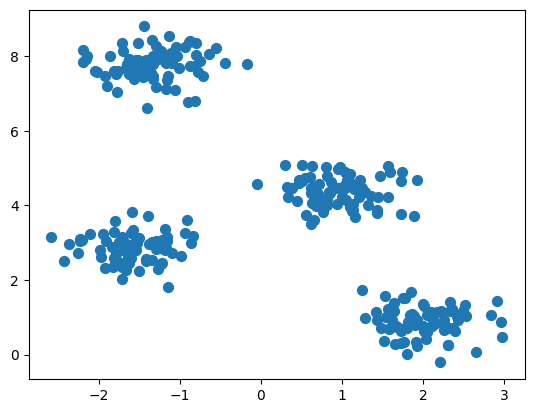

In [2]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.4, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

**Вопрос.** Сколько кластеров выделяется на графике?

<u>**Ответ**</u>: 4

**Вопрос.** Какая задача машинного обучения будет решаться (классификация, регрессия, кластеризация)?

<u>**Ответ**</u>: кластеризация

## Моделирование

Обучите модель K-means с числом кластеров `n_clusters=2`

In [3]:
from sklearn.cluster import KMeans

In [4]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 

km = KMeans(n_clusters=2, n_init='auto') # экземпляр KMeans
km.fit(X)

KMeans(n_clusters=2, n_init='auto')

Провизуализируем результат кластеризации

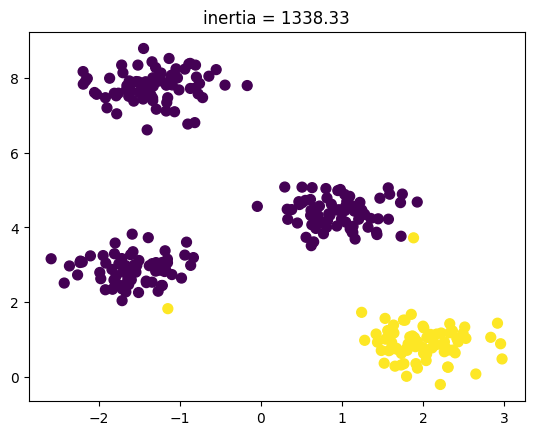

In [5]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=km.labels_)

plt.title(f'inertia = {km.inertia_:.2f}');

#### Подбор гиперпараметров

Видим, что результат не лучший. Попробуем подобрать оптимальное число кластеров, воспользовавшись "методом локтя". Для этого сделайте следующее:
1. Сохраните в список `rg` перебираемые значения кластеров
2. Создайте список `inertia`, куда будут сохраняться средние суммы квадратов объектов до центров кластеров
3. В цикле по `rg` обучаете алгоритм K-means с очередным числом кластеров и добавляете в список `inertia` значение в поле `km.inertia_`
4. Постройте график зависимости `inertia` от `rg`, воспользовавшись `plt.plot(rg, inertia)`. Подпишите оси графика и заголовок, воспользовавшись `plt.xlabel`, `plt.ylabel`, `plt.title`
5. В точке резкого перегиба будет лучшее число кластеров. Обучите модель с этим числом кластеров и убедитесь, что число корректное. Для этого повтороно визуализируйте результат кластеризации (воспользовавшись кодом выше)

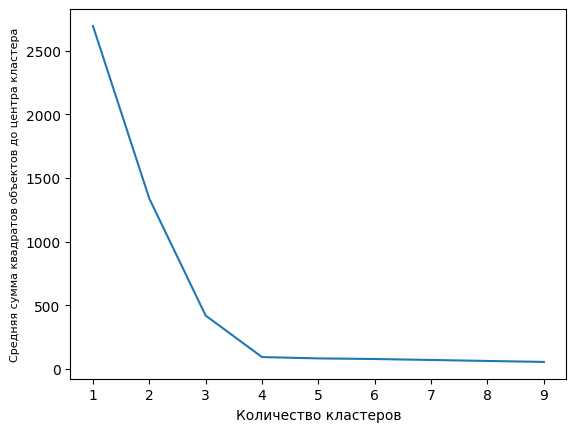

In [6]:
### ЗДЕСЬ ВАШ КОД ¯\_(ツ)_/¯ 
rg = np.arange(1, 10, 1)
inertia = [KMeans(num_clusters, n_init='auto').fit(X).inertia_ for num_clusters in rg]
plt.plot(rg, inertia);
plt.xlabel('Количество кластеров');
plt.ylabel('Средняя сумма квадратов объектов до центра кластера', fontsize=8);

**Вопрос.** Проанализируйте полученный график. Какое число кластеров оказалось оптимальным? Совпало ли это число с изначальным предположением?

<u>**Ответ**</u>: резкий перегиб наблюдается при 4 кластерах $\implies$ 4, число совпало с изначальным предположением

**(*) Дополнительно.** Попробуйте найти оптимальное число кластеров как аргумент `k` при минимуме функции
$$
Q(k) = \frac{|J(C_k) - J(C_{k+1})|}{|J(C_{k-1}) - J(C_{k})| } \to \min_{k}
$$
где $J(C_k)$ - это значение в поле `km.inertia_`

**(*) Дополнительно.** Попробуйте найти оптимальное число кластеров, подсчитав метрику силуэта для разного числа кластеров. Какое значение метрики силуэта лучшее? А худшее?

<u>**Ответ**</u>: _ _ _ _ _ _ _ _ _ _ _ _

In [7]:
from sklearn.metrics import silhouette_score

#### Обучение модели с лучшим гиперпараметров

Обучите модель K-means с лучшим найденным числом кластеров

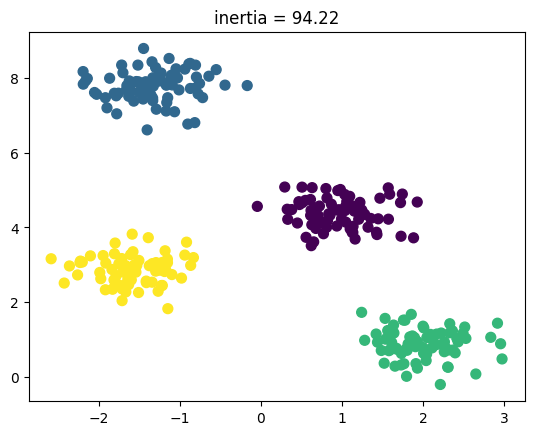

In [8]:
km = KMeans(n_clusters=4, n_init='auto') # экземпляр KMeans
km.fit(X)
plt.scatter(X[:, 0], X[:, 1], s=50, c=km.labels_)
plt.title(f'inertia = {km.inertia_:.2f}');

**(*) Дополнительно.** Попробуйте взять другие алгоритмы кластеризации. Например, [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) или [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html). Аналогичным образом обучите эти алгоритмы, визуализируйте результаты, подберите лучшие гиперпараметры и обучите с ними эти алгоритмы, после чего переходите к следующему разделу

## Подсчёт метрик

#### Метрика силуэта

Подсчитайте метрику силуэта для алгоритма с лучшими гиперпараметрами. Не забудьте, что данная метрика, первым параметром принимает исходные данные `X`, а вторым - номера кластеров. Подробнее про параметры функции [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)

**Примечание:** для получения номеров кластеров для каждого объекта, обратитесь к полю `km.labels_`

In [9]:
from sklearn.metrics import silhouette_score

In [11]:
print(f'Значение метрики силуэта: {silhouette_score(X, labels=km.labels_)}')

Значение метрики силуэта: 0.788482667982969


#### V-мера

Помним, что в нашем задаче известны реальные метки классов, хранимые в переменной `y_true`. Посмотрим, как соотносятся метки классов с найденными кластерами. Для этого подсчитаем метрику V-мера для алгоритма с лучшими гиперпараметрами. Не забудьте, что данная метрика принимает метки классов и номера кластеров. Подробнее про параметры функции [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html)

In [12]:
from sklearn.metrics import v_measure_score

In [14]:
print(f'Значение V-меры: {v_measure_score(y_true, km.labels_)}')

Значение V-меры: 1.0


## Выводы

**Вопрос.** Напишите выводы о проделанной работе. Что было попробовано? Какие результаты получены?

<u>**Ответ**</u>: был проведен анализ использования алгоритма обучения без учителя (KMeans).
Отбор количества кластеров проводился визуально, отобранное таким образом число (4) сошлось с результатом,
полученным с помощью "метода локтя". Так как мы идеально кластеризовали данные, получили V-мера=1,
кроме того значение метрики силуэта близко к 1, что говорит о том объекты похожи на другие объекты своего кластера. 